# Task 15

$f(x_1, x_2) = (x_1 - x_2, x_1x_2)^T = 0$
$
\begin{equation}
\begin{cases}
    x_1 - x_2 = 0 \\
    x_1 x_2 = 0
\end{cases}
\end{equation}
$

$
\begin{equation}
\begin{cases}
    x_1 = x_2 \\
    x_1 = x_2 = 0
\end{cases}
\end{equation}
$

$
J = \begin{bmatrix}
    (x_1 - x_2)_{x_1} & (x_1 - x_2)_{x_2} \\
    (x_1x_2)_{x_1} & (x_1x_2)_{x_2}
\end{bmatrix} = \begin{bmatrix}
    1 & -1 \\
    x_2 & x_1
\end{bmatrix}
$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def func(x):
    return np.array([x[0] - x[1], x[0] * x[1]])

def jacob(x):
    return np.array([
        [1, -1],
        [x[1], x[0]]
    ])

In [5]:
def newton(func, jacob, x_0, eps=1e-8):
    x = x_0.copy()
    
    x_hist = []
    res_hist = []

    f = func(x)
    x_hist.append(x)
    res_hist.append(np.linalg.norm(f))

    while res_hist[-1] > np.sqrt(eps):
        try:
            x = x - np.linalg.inv(jacob(x)) @ f

            f = func(x)
            x_hist.append(x)
            res_hist.append(np.linalg.norm(f))
        except np.linalg.LinAlgError:
            print('Method Failed')
            break

    return x, x_hist, res_hist

In [6]:
x, x_hist, res_hist = newton(func, jacob, np.array([1, 1,]))

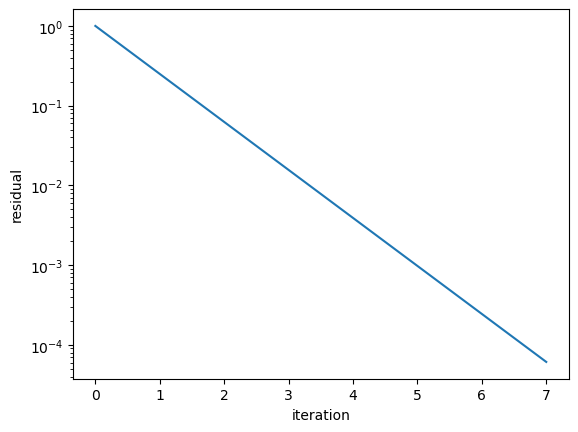

In [7]:
plt.plot(np.arange(len(res_hist)), res_hist)
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('residual')
plt.show()

# Task 16

$\arctan(x) = 0$  
$x = 0$

$\arctan'(x) = \frac{1}{1 + x^2}$

In [8]:
def der_arctan(x):
    return 1 / (1 + x ** 2).reshape(1, 1)

In [9]:
x, x_hist, res_hist = newton(np.arctan, der_arctan, np.array([2]), eps=1e-3)

Method Failed


/tmp/ipykernel_4469/1391934950.py:2: RuntimeWarning: overflow encountered in square
  return 1 / (1 + x ** 2).reshape(1, 1)


# Task 17

In [10]:
def newton_armijo(func, grad, x_0, alpha, beta, sigma, eps=1e-8, max_iter=10):
    x = x_0
    
    x_hist = []
    res_hist = []

    f = func(x)
    x_hist.append(x)
    res_hist.append(np.linalg.norm(f))

    for _ in range(max_iter):
        if res_hist[-1] < np.sqrt(eps):
            break
        
        try:

            alpha_k = alpha
            f = func(x)
            d = -1 / grad(x) * f 
            grad = grad(x)
            res = np.linalg.norm(f)

            new_f = func(x + alpha_k * d)
            new_res = np.linalg.norm(new_f)

            print('cond', (f - new_f) / alpha_k, -sigma * grad @ d)

            while (f - new_f) / alpha_k < -sigma * grad @ d:                
                alpha_k *= beta
                new_f = func(x + alpha_k * d)
                new_res = np.linalg.norm(new_f)
                
                print('cond', (f - new_f) / alpha_k, -sigma * grad @ d)

            x = x + alpha_k * d

            print('new x', x)

            x_hist.append(x)
            res_hist.append(new_res)

        except np.linalg.LinAlgError:
            print('Method Failed')
            break
    
    if res_hist[-1] < np.sqrt(eps):
        print('Method converged')
    else:
        print('Method did not converge')

    return x, x_hist, res_hist

In [61]:
def newton_armijo(func, grad, x_0, alpha, tao, c, eps=1e-8, max_iter=10):
    x = x_0
    x_hist = []
    res_hist = []

    f = func(x)
    x_hist.append(x)
    res_hist.append(np.abs(f))

    for _ in range(max_iter):
        if res_hist[-1] < np.sqrt(eps):
            break
            
        f = func(x)

        g = grad(x)
        p = -1 / g * f
        m = g @ p

        alpha_j = alpha
        new_f = func(x + alpha_j * p)

        t = -c * m
        print('while begin x', x, p)
        while f - new_f < alpha_j * t:
            print(x + alpha_j * p)
            alpha_j *= tao
            new_f = func(x + alpha_j * p)
        
        x = x + alpha_j * p
        print('new x', x)

        res_hist.append(np.abs(new_f))

        x_hist.append(x)
        res_hist.append
            
        
    if res_hist[-1] < np.sqrt(eps):
        print('Method converged')
    else:
        print('Method did not converge')

    return x, x_hist, res_hist

In [62]:
x, x_hist, res_hist = newton_armijo(
    np.arctan, 
    lambda x: np.array(1 / (1 + x**2)),
    np.array([2]),
    1,
    0.8,
    0.25,
    eps=1e-8,
    max_iter=100
)

while begin x [2] [-5.53574359]
new x [-3.53574359]
while begin x [-3.53574359] [17.48670268]
[13.95095909]
[10.45361855]
[7.65574612]
[5.41744818]
[3.62680983]
[2.19429914]
[1.0482906]
[0.13148376]
[-0.60196171]
[-1.18871809]
[-1.65812319]
[-2.03364727]
[-2.33406653]
[-2.57440194]
[-2.76667027]
[-2.92048494]
[-3.04353667]
[-3.14197805]
[-3.22073116]
[-3.28373364]
[-3.33413563]
[-3.37445722]
[-3.4067145]
[-3.43252032]
[-3.45316497]
[-3.46968069]
[-3.48289327]
[-3.49346334]
[-3.50191939]
[-3.50868423]
[-3.5140961]
[-3.5184256]
[-3.5218892]
[-3.52466007]
[-3.52687678]
[-3.52865014]
[-3.53006883]
[-3.53120378]
[-3.53211174]
[-3.53283811]
[-3.53341921]
[-3.53388408]
[-3.53425598]
[-3.53455351]
[-3.53479152]
[-3.53498194]
[-3.53513427]
[-3.53525613]
[-3.53535362]
[-3.53543162]
[-3.53549401]
[-3.53554393]
[-3.53558386]
[-3.5356158]
[-3.53564136]
[-3.53566181]
[-3.53567816]
[-3.53569125]
[-3.53570172]
[-3.53571009]
[-3.53571679]
[-3.53572215]
[-3.53572644]
[-3.53572987]
[-3.53573261]
[-3.5357

In [63]:
x_hist

[array([2]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359]),
 array([-3.53574359])

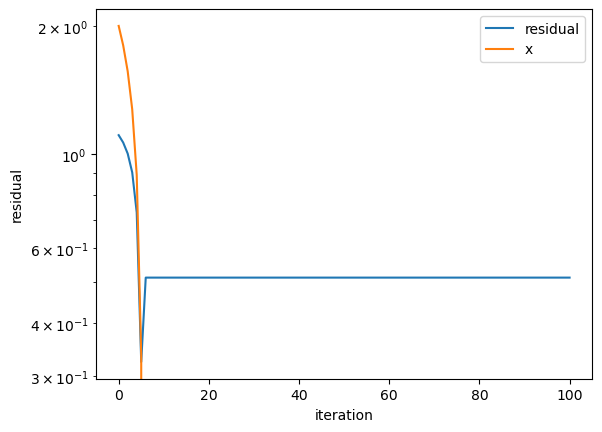

In [54]:
plt.plot(np.arange(len(res_hist)), res_hist, label='residual')
plt.plot(np.arange(len(x_hist)), x_hist, label='x')

plt.legend()
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('residual')
plt.show()